In [1]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

In [2]:
geom = ase.io.read("./xyz_files/clars_goblet.xyz")
lat = [
    [1.0,0.0],
    [0.0,1.0]
]
geom.center(about=0.0)
orb = []

for at in geom:
    orb.append(at.position[:2])

In [12]:
chemical_potential = 0.999512

In [13]:
f = open("sorted_ev_ev.txt","r")
#print(f.readline())

num_lines = sum(1 for line in open('sorted_ev_ev.txt', "r"))
print(num_lines)
num_values_evecs = int(num_lines / 2)

evals = np.zeros(num_lines, dtype=float)
evecs_shape = (num_lines, num_values_evecs)
evecs = np.zeros(evecs_shape, dtype=complex)

total_spin_up = np.zeros(int(num_lines/2), dtype=float)
total_spin_down = np.zeros(int(num_lines/2), dtype=float)
up_spins = 0
down_spins = 0


evals_up = np.full(num_lines, -100, dtype=float)
evals_down = np.full(num_lines, -100, dtype=float)
counter_up = 0
counter_down = 0
    
    
counter = 0
word_count = 0
for line in f:
    #if(counter == 39):
     #   print("Line: " + str(counter))
      #  print(line[:3])
       # print(line)

        
    spin = line[:2]

    line = line[3:]

    splitted_line = line.split(' ')

    evals[counter] = np.float64(splitted_line[0])
    
    if(spin == 'su'):
        evals_up[counter_up] = evals[counter] - chemical_potential
        counter_up = counter_up + 1
    if(spin == 'sd'):
        evals_down[counter_down] = evals[counter] - chemical_potential
        counter_down = counter_down + 1
    
    #print("spin: " + str(spin) + "\teval: " + str(evals[counter]))
    splitted_line.pop(0)
    
    x = ''
    y = ''
    y_turn = False
    
    for j in range(len(splitted_line)):    
        for i in splitted_line[j]:
            if(i == '(' or i == ' '):
                continue
            if(i != ',' and y_turn == False):
                x += i
            elif(i == ','):
                y_turn = True
                continue
            elif(i != ')'):
                y += i
            else:
                evecs[counter, word_count] = complex(float(x), float(y))
                x = ''
                y = ''
                word_count = word_count + 1
                y_turn = False


    word_count = 0
    counter = counter + 1
    
    if(spin == 'su'):
        if(chemical_potential > evals[counter-1]):
            up_spins = up_spins + 1
            total_spin_up = np.add(total_spin_up, np.square(evecs[counter-1]))
    if(spin == 'sd'):
        if(chemical_potential > evals[counter-1]):
            down_spins = down_spins + 1
            total_spin_down = np.add(total_spin_down, np.square(evecs[counter-1]))

    if counter == num_lines:
        break
        
        
print("total up spins: " + str(up_spins))
print("total down spins: " + str(down_spins))
print(total_spin_up)
print(total_spin_down)
spin_difference = ((total_spin_up - total_spin_down))
print(np.shape(spin_difference))
print(spin_difference)

print("evals spin up: " + str(evals_up))
print("evals spin down: " + str(evals_down))

76
total up spins: 19
total down spins: 19
[0.55600104+0.j 0.43825738+0.j 0.55600104+0.j 0.44399979+0.j
 0.5617435 +0.j 0.45821006+0.j 0.54714347+0.j 0.45235521+0.j
 0.6077546 +0.j 0.44399979+0.j 0.6077546 +0.j 0.45235521+0.j
 0.54714347+0.j 0.39224552+0.j 0.54764405+0.j 0.45285579+0.j
 0.54179078+0.j 0.39224552+0.j 0.54764405+0.j 0.45285579+0.j
 0.63005822+0.j 0.43061334+0.j 0.63347238+0.j 0.44311856+0.j
 0.44311856+0.j 0.69200766+0.j 0.63005822+0.j 0.43061334+0.j
 0.63347238+0.j 0.55688282+0.j 0.36652865+0.j 0.56938713+0.j
 0.36994162+0.j 0.55688282+0.j 0.30799212+0.j 0.36994162+0.j
 0.56938713+0.j 0.36652865+0.j]
[0.44399954+0.j 0.56174326+0.j 0.44399954+0.j 0.55600104+0.j
 0.43825713+0.j 0.5417899 +0.j 0.45285562+0.j 0.54764478+0.j
 0.39224552+0.j 0.55600104+0.j 0.39224552+0.j 0.54764478+0.j
 0.45285562+0.j 0.60775446+0.j 0.45235504+0.j 0.54714347+0.j
 0.45821061+0.j 0.60775446+0.j 0.45235504+0.j 0.54714347+0.j
 0.36994162+0.j 0.56938682+0.j 0.3665284 +0.j 0.55688267+0.j
 0.5568826

In [14]:
ed = num_lines//2
print(num_lines, ed)
homo = ed-1

76 38


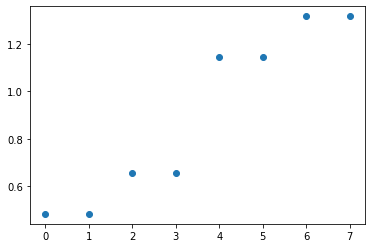

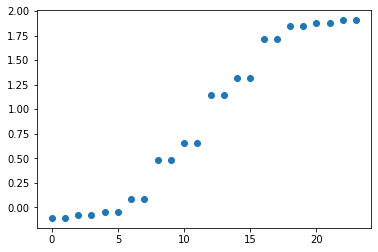

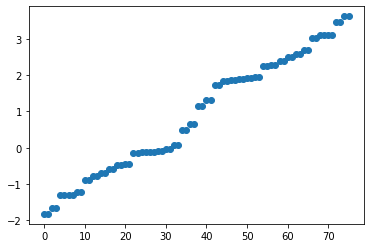

-1.8199
-1.8199
-1.6557
-1.6557
-1.3104
-1.3104
-1.30859
-1.30859
-1.20847
-1.20847
-0.894545
-0.894545
-0.779893
-0.779893
-0.705453
-0.705453
-0.582877
-0.582877
-0.472543
-0.472543
-0.450338
-0.450338
-0.142156
-0.142156
-0.110548
-0.110548
-0.106256
-0.106256
-0.0791089
-0.0791088
-0.046925
-0.046925
0.0847617
0.0847618
0.482098
0.482098
0.655249
0.655249


In [15]:
plt.plot(evals[ed-4:ed+4], 'o')
plt.show()

plt.plot(evals[ed-12:ed+12], 'o')
plt.show()

plt.plot(evals[:], 'o')
plt.show()


for ev in evals[0:38]:
    print(ev)



In [16]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=2.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)
        phase = np.angle(e)/np.pi
        col = (1.0-phase, 0.0, phase)
        circ = plt.Circle(p[:2], np.cbrt(mod), color=col, zorder=10)
        ax.add_artist(circ)

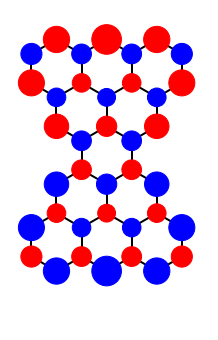

In [17]:
fig=plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_aspect('equal')
visualize_backbone(ax, geom)
visualize_evec(ax, geom, spin_difference)
plt.axis('off')
plt.xlim([-5, 5])
plt.ylim([-8, 8])

plt.savefig("./figures/figures_clars_tb/spin_diff.png", dpi=500, bbox_inches='tight')

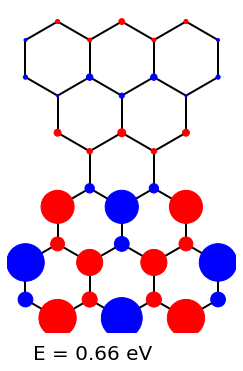

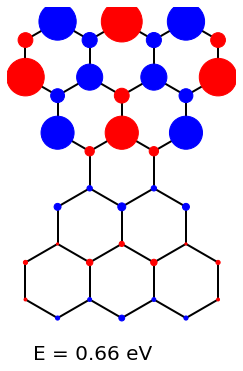

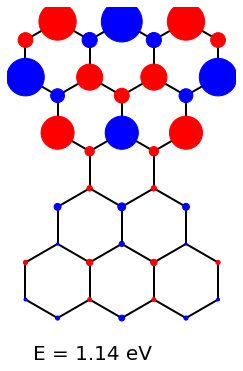

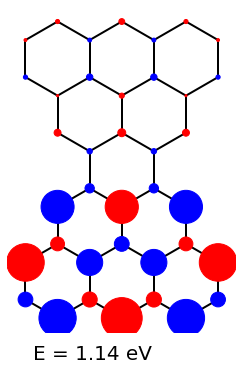

In [18]:
for ind in range(ed-2,ed+2):
    fig=plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.set_aspect('equal')
    visualize_backbone(ax, geom)
    visualize_evec(ax, geom, evecs[ind,:])
    plt.axis('off')
    xmin = np.min(geom.positions[:, 0])-0.7
    xmax = np.max(geom.positions[:, 0])+0.7
    ymin = np.min(geom.positions[:, 1])+1.0
    ymax = np.max(geom.positions[:, 1])+1.0
    plt.xlim([xmin, xmax])
    plt.text(xmin+1.0, ymin-2.6, "E = %.2f eV" % evals[ind], fontsize=20)
    #plt.savefig("./figures/figures_clar/orb_%d_%d.png" % (ind, ind-homo), dpi=300, bbox_inches='tight')

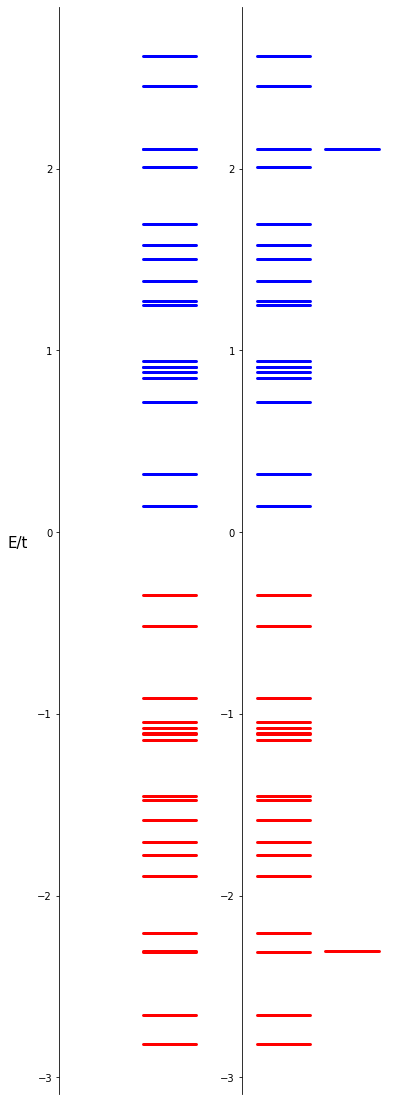

In [19]:
#chemical_potential = 0.875
past_ev_up = -100
past_ev_down = -100


fig = plt.figure(figsize=(6, 20))
plt.subplot(121)
ax = plt.gca()
for ev in evals_down:
    if ev == -100:
        continue
    
    col = 'b'
    if ev < 0.0:
        col = 'r'
        #print("Down spin ev: " + str(ev))
    if(ev > past_ev_down + 0.001):
        plt.plot([0.55, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    else:
        plt.plot([0.1, 0.45], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    past_ev_down = ev


ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
#plt.ylim(-1.8, 1.8)
plt.ylabel("E/t", rotation=0, fontsize=15, labelpad=20)

###

plt.subplot(122)
ax = plt.gca()
for ev in evals_up:
    if ev == -100:
        continue
        
    col = 'b'
    if ev < 0.0:
        col = 'r'
        #print("Up spin ev: " + str(ev))
    if(ev > past_ev_up + 0.003):
        plt.plot([0.1, 0.45], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    else:
        plt.plot([0.55, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    past_ev_up = ev
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
#plt.ylim(-1.8, 1.8)

plt.savefig("./figures/figures_clars_tb/spin_occ.png", dpi=500, bbox_inches='tight')
plt.show()

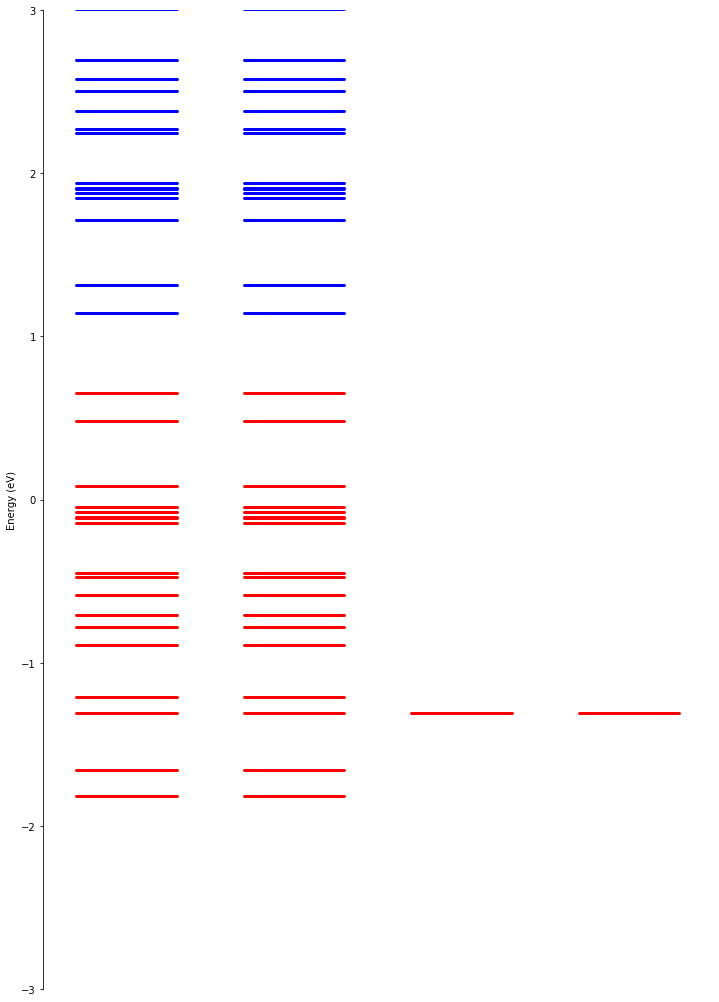

In [20]:
past_ev = -100
last_loc = 0

fig = plt.figure(figsize=(12, 18))
ax = plt.gca()
for ev in evals[ed-ed:ed*2]:
    col = 'b'
    if ev < chemical_potential:
        col = 'r'
        
    if ev > past_ev + 0.003:
        last_loc = 0
    
    loc_x = 0.05 + last_loc * 0.25 
    loc_y = loc_x + 0.15
    
    if last_loc != 0:
        plt.plot([loc_x, loc_y], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
        last_loc = last_loc + 1
    else:
        plt.plot([0.05, 0.20], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
        last_loc = 1
    
    past_ev = ev
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-3.0, 3.0)
plt.ylabel("Energy (eV)")
plt.savefig("./figures/figures_clars_tb/clars_goblet_spin_occ_single_channel.png", dpi=300, bbox_inches='tight')
